<a name="1"></a>
# **<h1 id="1" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Import Libraries</h1>**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plotter
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h5><span style="align:left; color:black; font-weight:550; font-size:110%%">
    ➡️At first, we import nessesary python liblaries.
</span></h5>

<a name="2"></a>
# **<h1 id="2" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Read Dataset</h1>**

In [2]:
train = pd.read_csv('/kaggle/input/bank-term-deposit-predictions/train.csv')
test_first = pd.read_csv('/kaggle/input/bank-term-deposit-predictions/test.csv')
display(train)
display(test_first)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


<h5><span style="align:left; color:black; font-weight:550; font-size:110%%">
    ➡️ Here, we import data from a csv file, wit pandas
</span></h5>

In [3]:
test= test_first.drop(columns=['y'],axis=1)
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other


<h5><span style="align:left; color:black; font-weight:550; font-size:110%%">
    ➡️ Remove the predicted value of test first.
</span></h5>

<a name="3"></a>
# **<h1 id="3" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">EDA</h1>**

train


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

test


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

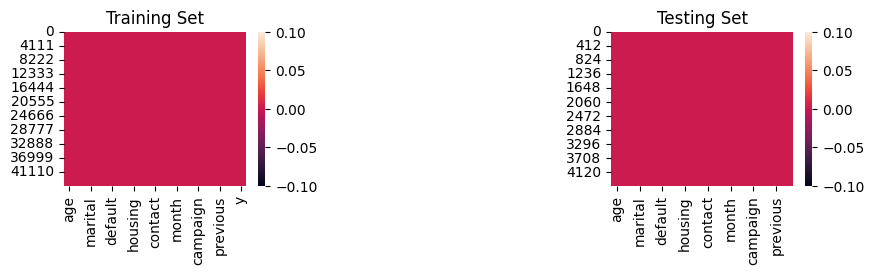

In [4]:
print('train')
display(train.isnull().sum())
print('test')
display(test.isnull().sum())

plt.figure(figsize = (10, 2))

plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.heatmap(train.isnull())

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.heatmap(test.isnull())
plt.show()

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️ Dataset is no Missing values in DataFrame.
</span></h5>

In [5]:
print('train')
display(train.info())
print('test')
display(test.info())

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.2+ KB


None

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  train have 45211 samples and test have 4521 samples , with no-null values, 
</span></h5>

In [6]:
train_test=train._append(test,ignore_index=True)
train_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,NaN
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,NaN
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,NaN
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,NaN


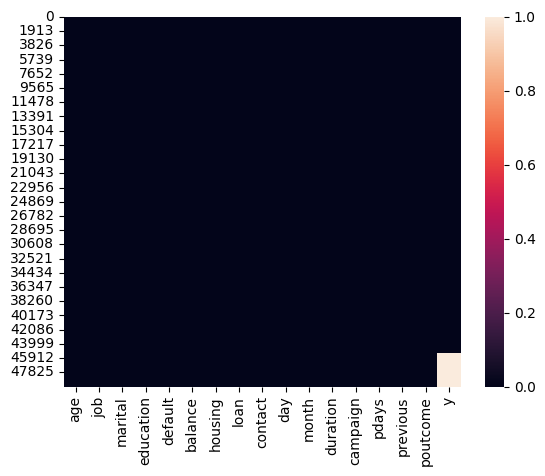

In [7]:
sns.heatmap(train_test.isnull())
plt.show()

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️ The visualization shows that the target of test is currently the NA value.
</span></h5>

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_test['job'] = le.fit_transform(train_test['job'])
train_test['marital'] = le.fit_transform(train_test['marital'])
train_test['education'] = le.fit_transform(train_test['education'])
train_test['default'] = le.fit_transform(train_test['default'])
train_test['housing'] = le.fit_transform(train_test['housing'])
train_test['loan'] = le.fit_transform(train_test['loan'])
train_test['contact'] = le.fit_transform(train_test['contact'])
train_test['month'] = le.fit_transform(train_test['month'])
train_test['poutcome'] = le.fit_transform(train_test['poutcome'])
display(train_test)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,NaN
49728,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,NaN
49729,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,NaN
49730,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,NaN


<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    ➡️ We convert the object columns by <code>LabelEncoder()</code>.
</span></h5>

In [9]:
train_feature = train_test.columns.drop('y').tolist()
train_test[train_feature].describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[0])\
        .background_gradient(subset=['std'], cmap='BuPu')\
        .background_gradient(subset=['50%'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
age,49732.000000,40.957472,10.615008,18.000000,33.000000,39.000000,48.000000,95.000000
job,49732.000000,4.346256,3.271152,0.000000,1.000000,4.000000,7.000000,11.000000
marital,49732.000000,1.165909,0.607476,0.000000,1.000000,1.000000,2.000000,2.000000
education,49732.000000,1.225408,0.748060,0.000000,1.000000,1.000000,2.000000,3.000000
default,49732.000000,0.017916,0.132648,0.000000,0.000000,0.000000,0.000000,1.000000
balance,49732.000000,1367.761562,3041.608766,-8019.000000,72.000000,448.000000,1431.000000,102127.000000
housing,49732.000000,0.556764,0.496772,0.000000,0.000000,1.000000,1.000000,1.000000
loan,49732.000000,0.159555,0.366197,0.000000,0.000000,0.000000,0.000000,1.000000
contact,49732.000000,0.641338,0.898272,0.000000,0.000000,0.000000,2.000000,2.000000
day,49732.000000,15.816315,8.315680,1.000000,8.000000,16.000000,21.000000,31.000000


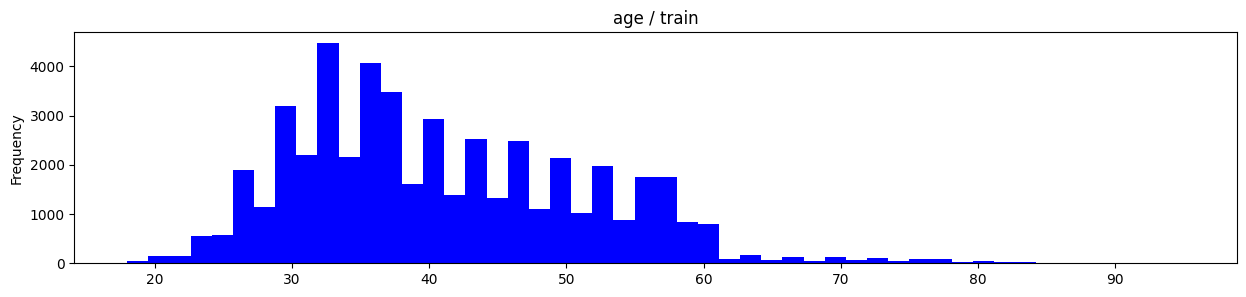

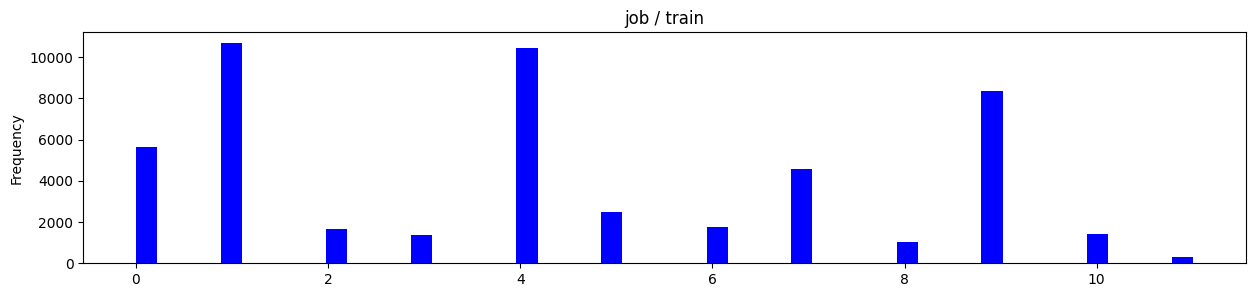

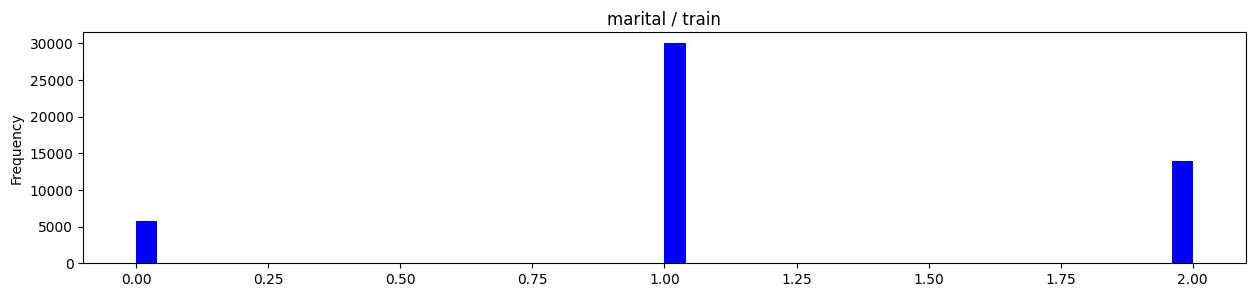

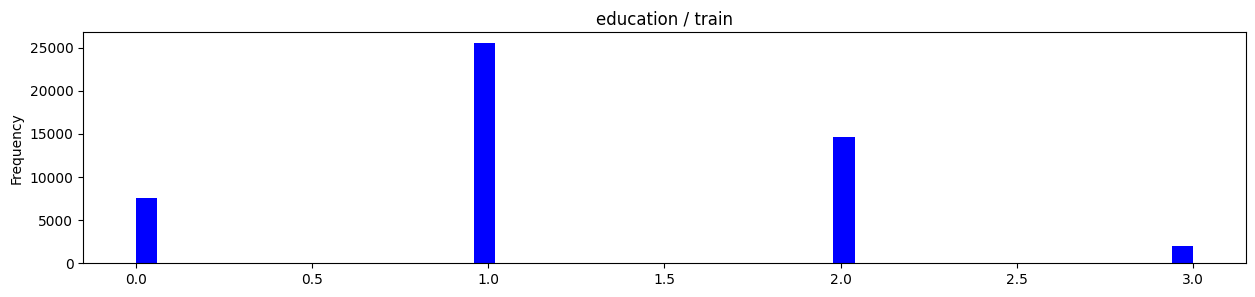

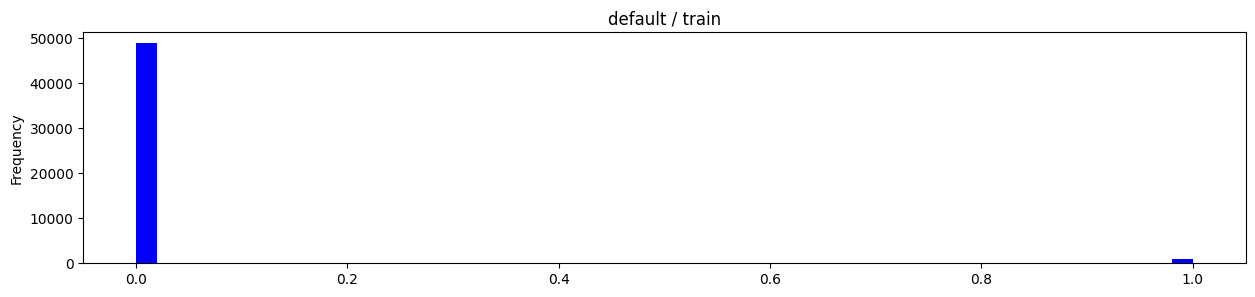

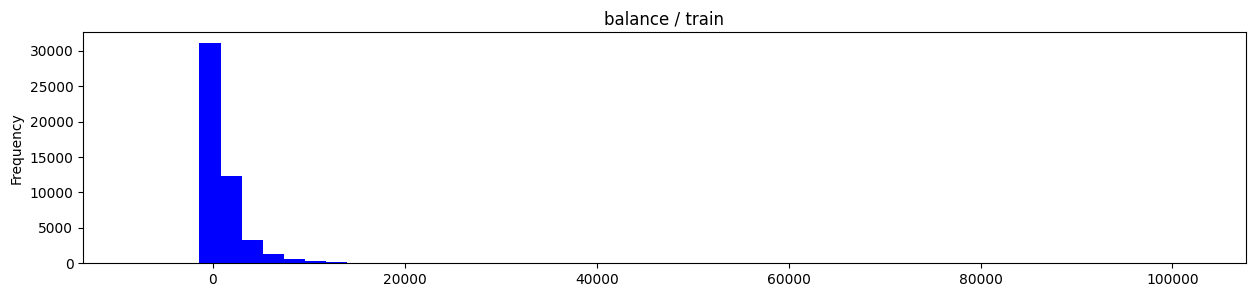

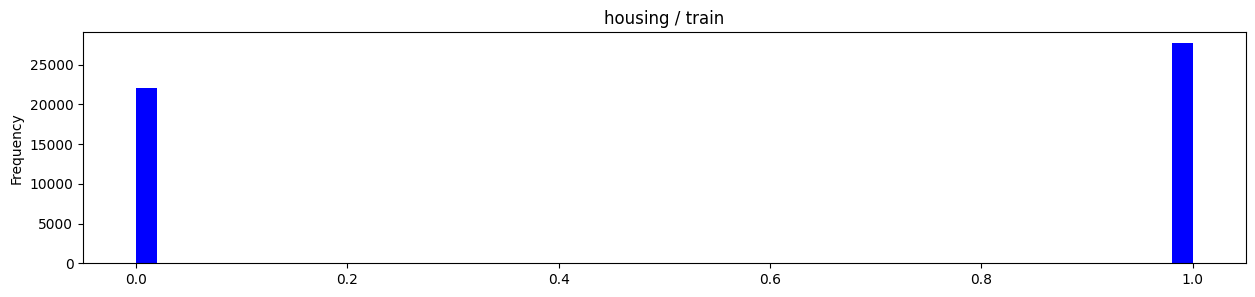

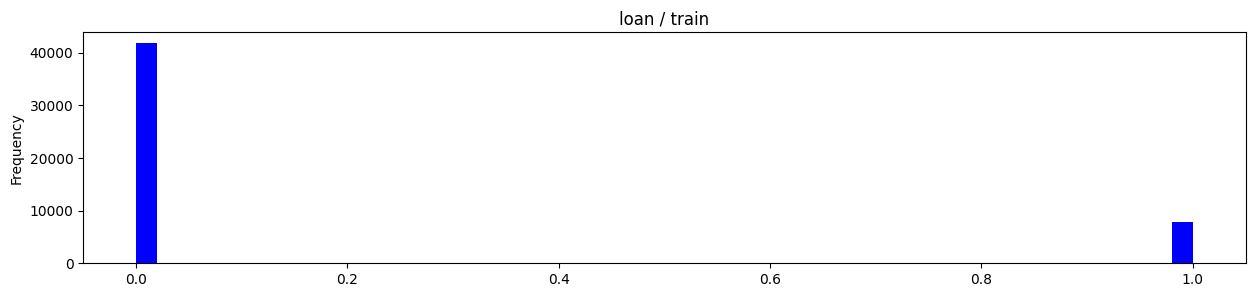

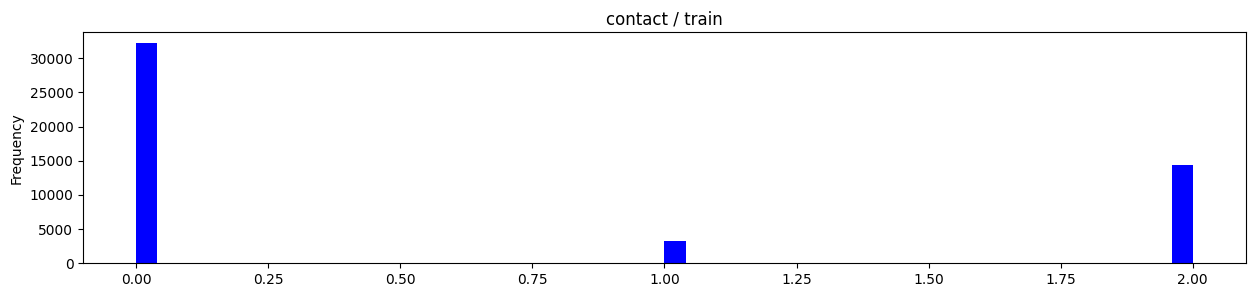

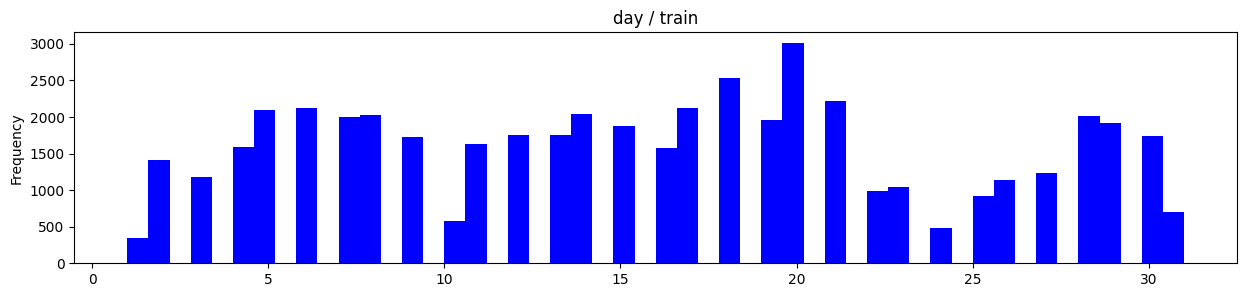

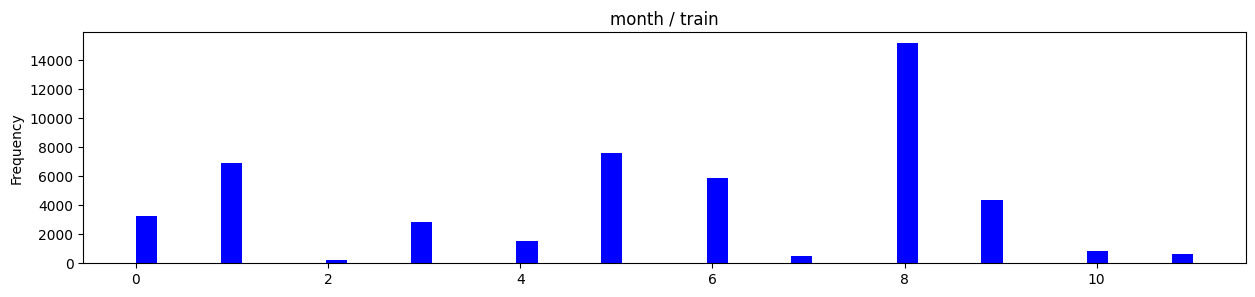

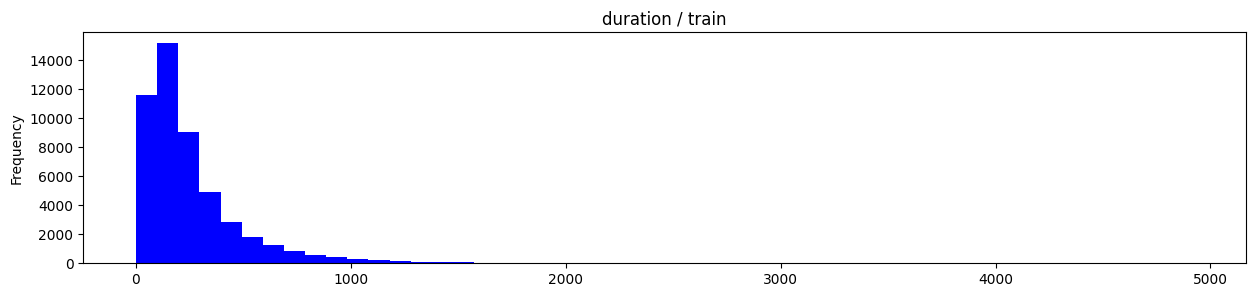

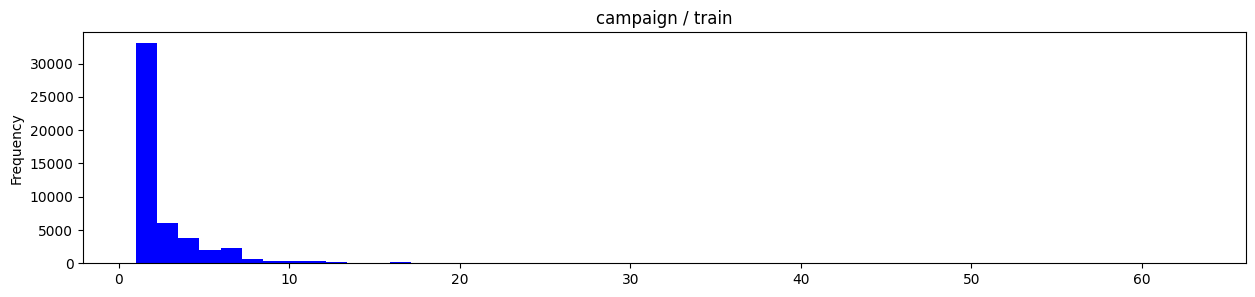

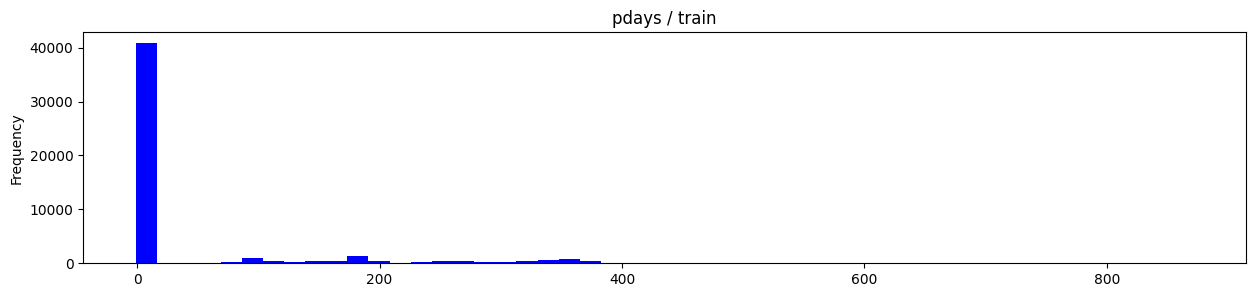

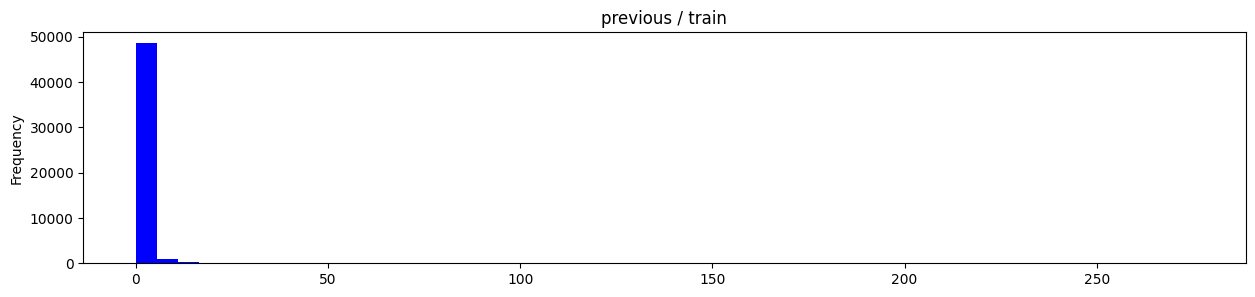

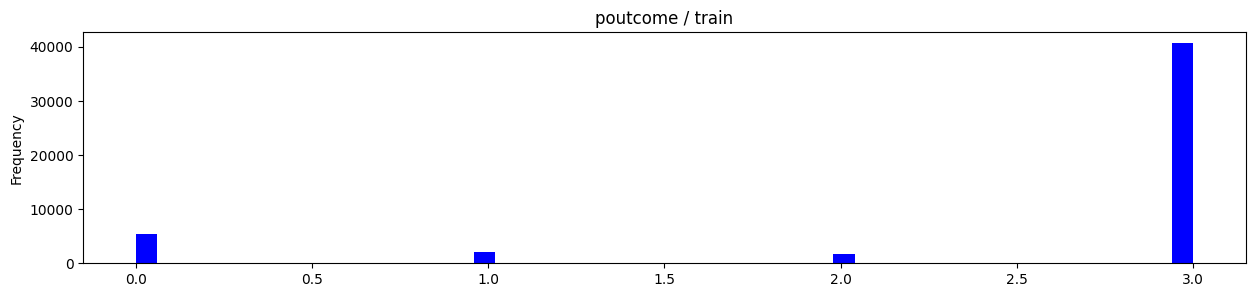

In [10]:
for feat in train_feature:
    plt.figure(figsize=(15,3))
    train_test[feat].plot(kind='hist', bins=50, color='blue')
    plt.title(feat + ' / train')
    plt.show()

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️ You can visually analyze which data distributions are not normal, and then perform skew and kurt analysis.
</span></h5>

In [11]:
train_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
print("Skewness: %f" % train_test['default'].skew())
print("Kurtosis: %f" % train_test['default'].kurt())
print("Skewness: %f" % train_test['balance'].skew())
print("Kurtosis: %f" % train_test['balance'].kurt())
print("Skewness: %f" % train_test['duration'].skew())
print("Kurtosis: %f" % train_test['duration'].kurt())
print("Skewness: %f" % train_test['campaign'].skew())
print("Kurtosis: %f" % train_test['campaign'].kurt())
print("Skewness: %f" % train_test['pdays'].skew())
print("Kurtosis: %f" % train_test['pdays'].kurt())
print("Skewness: %f" % train_test['previous'].skew())
print("Kurtosis: %f" % train_test['previous'].kurt())
print("Skewness: %f" % train_test['poutcome'].skew())
print("Kurtosis: %f" % train_test['poutcome'].kurt())

Skewness: 7.268932
Kurtosis: 50.839412
Skewness: 8.204429
Kurtosis: 136.165306
Skewness: 3.109530
Kurtosis: 17.621268
Skewness: 4.884266
Kurtosis: 39.053283
Skewness: 2.624838
Kurtosis: 7.026964
Skewness: 40.783648
Kurtosis: 4463.729868
Skewness: -1.972654
Kurtosis: 2.148438


<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️ Visualization can be used to analyze the skew and kurt analysis, and the above data must be adjusted.
</span></h5>

In [13]:
#default
train_test['default'], lambdaValue =stats.yeojohnson(train_test['default'])
print('skewness:%f'%stats.skew(train_test['default'], bias = False))
print('kurtosis:%f'%stats.kurtosis(train_test['default'], bias = False, fisher=True))
print('best lambda:%f'%lambdaValue)

#balance
train_test['balance'], lambdaValue =stats.yeojohnson(train_test['balance'])
print('skewness:%f'%stats.skew(train_test['balance'], bias = False))
print('kurtosis:%f'%stats.kurtosis(train_test['balance'], bias = False, fisher=True))
print('best lambda:%f'%lambdaValue)

#duration
train_test['duration'], lambdaValue =stats.yeojohnson(train_test['duration'])
print('skewness:%f'%stats.skew(train_test['duration'], bias = False))
print('kurtosis:%f'%stats.kurtosis(train_test['duration'], bias = False, fisher=True))
print('best lambda:%f'%lambdaValue)

#campaign
train_test['campaign'], lambdaValue =stats.yeojohnson(train_test['campaign'])
print('skewness:%f'%stats.skew(train_test['campaign'], bias = False))
print('kurtosis:%f'%stats.kurtosis(train_test['campaign'], bias = False, fisher=True))
print('best lambda:%f'%lambdaValue)

#pdays
train_test['pdays'], lambdaValue =stats.yeojohnson(train_test['pdays'])
print('skewness:%f'%stats.skew(train_test['pdays'], bias = False))
print('kurtosis:%f'%stats.kurtosis(train_test['pdays'], bias = False, fisher=True))
print('best lambda:%f'%lambdaValue)

#previous
train_test['previous'], lambdaValue =stats.yeojohnson(train_test['previous'])
print('skewness:%f'%stats.skew(train_test['previous'], bias = False))
print('kurtosis:%f'%stats.kurtosis(train_test['previous'], bias = False, fisher=True))
print('best lambda:%f'%lambdaValue)

#poutcome
train_test['poutcome'], lambdaValue =stats.yeojohnson(train_test['poutcome'])
print('skewness:%f'%stats.skew(train_test['poutcome'], bias = False))
print('kurtosis:%f'%stats.kurtosis(train_test['poutcome'], bias = False, fisher=True))
print('best lambda:%f'%lambdaValue)

skewness:7.268932
kurtosis:50.839412
best lambda:-80.525374
skewness:1.126183
kurtosis:82.306362
best lambda:0.836876
skewness:0.017596
kurtosis:0.416995
best lambda:0.135133
skewness:0.230920
kurtosis:-1.210925
best lambda:-1.083719
skewness:1.646965
kurtosis:0.715650
best lambda:-0.603526
skewness:1.647701
kurtosis:0.720215
best lambda:-4.111387
skewness:-1.684575
kurtosis:0.889923
best lambda:4.881050


<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  There are many ways to adjust the distribution of data, but stats.yeojohnson is very suitable for newcomers to use, very recommended for everyone to use!   <code>stats.yeojohnson</code>
</span></h5>

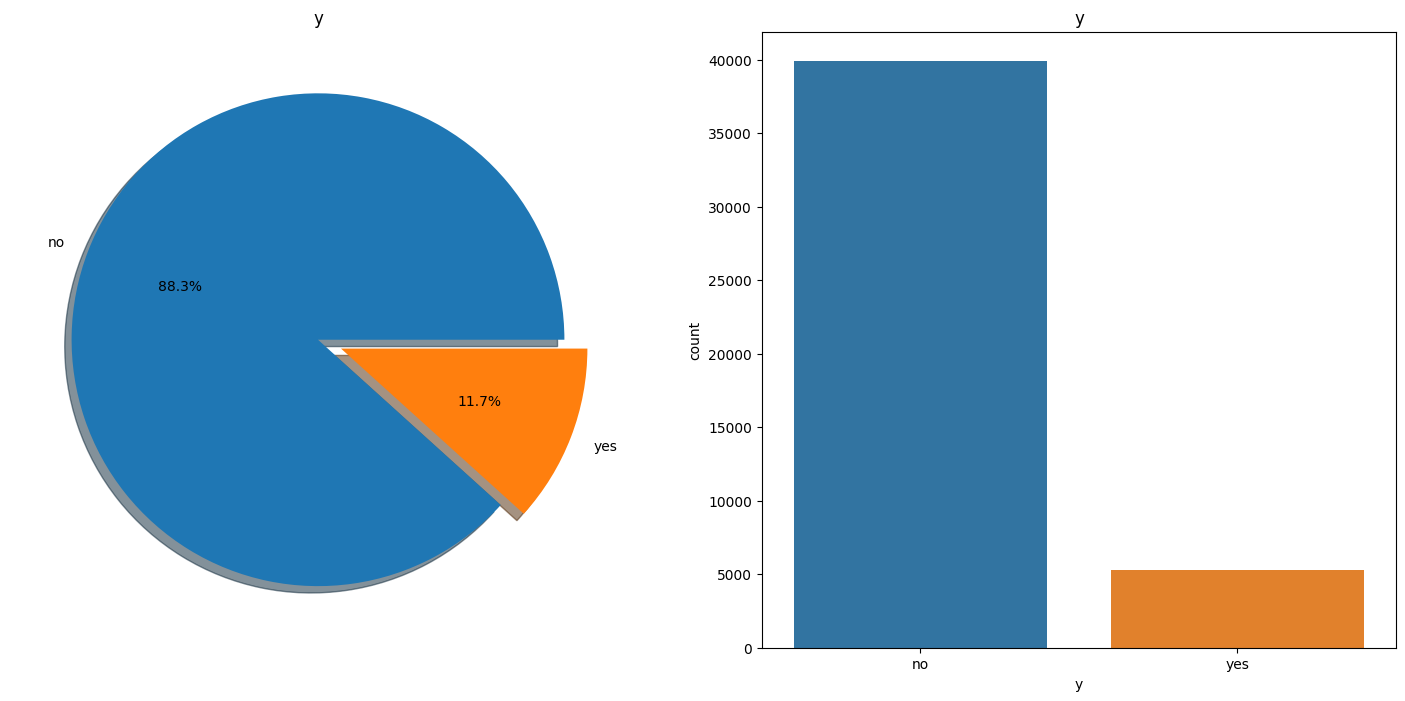

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train["y"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('y')
ax[0].set_ylabel('')
sns.countplot(x = train["y"],ax=ax[1])
ax[1].set_title('y')
plt.show()

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️ Visualize the distribution of train dataset targets.
</span></h5>
<ul><span style="color:Orange; font-weight:600"> yes: 88.3%</span></ul>
<ul><span style="color:blue; font-weight:600"> no : 11.7%</span></ul>
</span></h5>

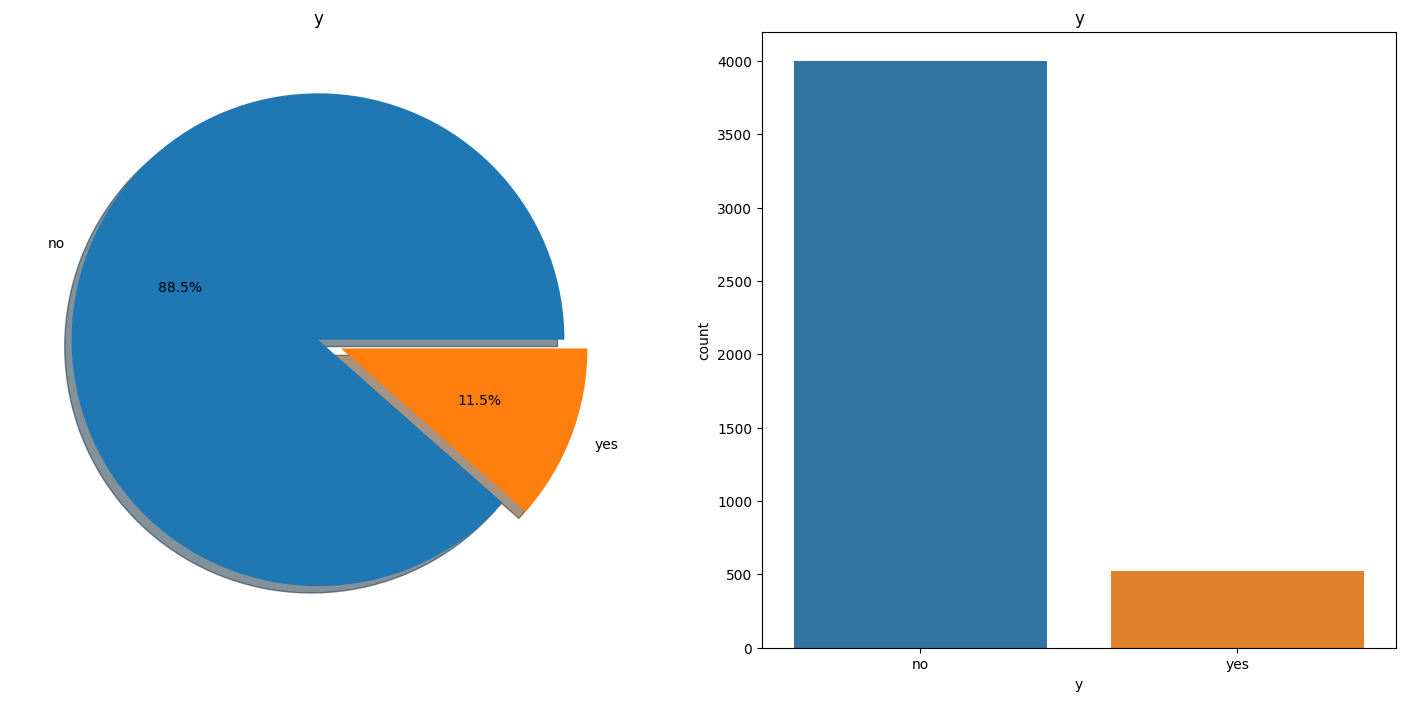

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
test_first["y"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('y')
ax[0].set_ylabel('')
sns.countplot(x = test_first["y"],ax=ax[1])
ax[1].set_title('y')
plt.show()

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️ Visualize the distribution of test dataset targets.
</span></h5>
<ul><span style="color:Orange; font-weight:600"> yes: 88.5%</span></ul>
<ul><span style="color:blue; font-weight:600"> no : 11.5%</span></ul>
</span></h5>

<a name="4"></a>
# **<h1 id="4" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Feature Selection</h1>**

<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    ➡️ Map features in range 0 to 1 to normalize data and decrease effect of big values by <code>MinMaxScaler()</code>.
</span></h5>

In [16]:
train = pd.DataFrame(train_test).head(45211)
test = pd.DataFrame(train_test).tail(4521)
test =  test.reset_index(drop=True)
display(train)
display(test)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,-0.0,731.903324,1,0,2,5,8,8.304623,0.487386,-1.950317,-0.000000,177.693334,no
1,44,9,2,1,-0.0,19.387984,1,0,2,5,8,7.190630,0.487386,-1.950317,-0.000000,177.693334,no
2,33,2,1,1,-0.0,1.801690,1,1,2,5,8,5.909503,0.487386,-1.950317,-0.000000,177.693334,no
3,47,1,1,3,-0.0,544.596557,1,0,2,5,8,6.253430,0.487386,-1.950317,-0.000000,177.693334,no
4,33,11,2,3,-0.0,0.939420,0,0,2,5,8,7.731640,0.487386,-1.950317,-0.000000,177.693334,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,-0.0,328.787288,0,0,0,17,9,11.364160,0.717339,-1.950317,-0.000000,177.693334,yes
45207,71,5,0,0,-0.0,611.413751,0,0,0,17,9,9.530815,0.642194,-1.950317,-0.000000,177.693334,yes
45208,72,5,1,1,-0.0,1664.366311,0,0,0,17,9,11.729491,0.790380,1.585971,0.242413,43.480834,yes
45209,57,1,1,1,-0.0,275.417195,0,0,1,17,9,9.779177,0.761463,-1.950317,-0.000000,177.693334,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,-0.000000,628.555392,0,0,0,19,10,5.978424,0.487386,-1.950317,-0.000000,177.693334,NaN
1,33,7,1,1,-0.000000,1435.368238,1,1,0,11,8,7.947580,0.487386,1.607784,0.242902,0.000000,NaN
2,35,4,2,2,-0.000000,496.897977,1,0,0,16,0,7.594126,0.487386,1.606982,0.229155,0.000000,NaN
3,30,4,1,2,-0.000000,535.488910,1,1,2,3,6,7.741894,0.761463,-1.950317,-0.000000,177.693334,NaN
4,59,1,1,1,-0.000000,0.000000,1,0,2,5,8,8.003237,0.487386,-1.950317,-0.000000,177.693334,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,-0.000000,-740.114526,1,0,0,30,5,8.802038,0.790380,-1.950317,-0.000000,177.693334,NaN
4517,57,6,1,2,0.012418,-10689.174599,1,1,2,9,8,7.216427,0.487386,-1.950317,-0.000000,177.693334,NaN
4518,57,9,1,1,-0.000000,138.604207,0,0,0,19,1,7.190630,0.860295,-1.950317,-0.000000,177.693334,NaN
4519,28,1,1,1,-0.000000,430.276567,0,0,0,6,3,6.885598,0.761463,1.591572,0.242413,5.832237,NaN


In [17]:
train["y"] = train["y"].replace({'no':0,'yes':1,})
display(train)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,-0.0,731.903324,1,0,2,5,8,8.304623,0.487386,-1.950317,-0.000000,177.693334,0
1,44,9,2,1,-0.0,19.387984,1,0,2,5,8,7.190630,0.487386,-1.950317,-0.000000,177.693334,0
2,33,2,1,1,-0.0,1.801690,1,1,2,5,8,5.909503,0.487386,-1.950317,-0.000000,177.693334,0
3,47,1,1,3,-0.0,544.596557,1,0,2,5,8,6.253430,0.487386,-1.950317,-0.000000,177.693334,0
4,33,11,2,3,-0.0,0.939420,0,0,2,5,8,7.731640,0.487386,-1.950317,-0.000000,177.693334,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,-0.0,328.787288,0,0,0,17,9,11.364160,0.717339,-1.950317,-0.000000,177.693334,1
45207,71,5,0,0,-0.0,611.413751,0,0,0,17,9,9.530815,0.642194,-1.950317,-0.000000,177.693334,1
45208,72,5,1,1,-0.0,1664.366311,0,0,0,17,9,11.729491,0.790380,1.585971,0.242413,43.480834,1
45209,57,1,1,1,-0.0,275.417195,0,0,1,17,9,9.779177,0.761463,-1.950317,-0.000000,177.693334,0


XGBClassifie: 
 [0.0275446  0.01646001 0.02249299 0.02154293 0.01886867 0.01887946
 0.10990304 0.05346717 0.14685129 0.0279926  0.06869467 0.12936996
 0.02452966 0.05002243 0.02383692 0.23954357]


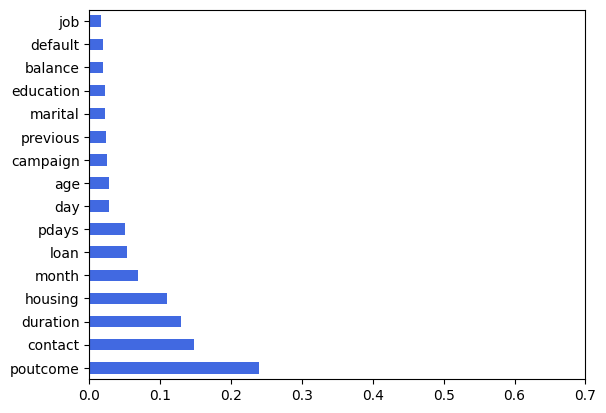

In [18]:
from xgboost import XGBClassifier

X_data_feature= train.drop(columns=['y'],axis=1)
y_data_feature= train['y']

model = [XGBClassifier()]

model = [model[i].fit(X_data_feature,y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(20).plot(kind='barh', color='royalblue')
    plt.xlim(0, 0.7)
    plt.show()

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️ To analyze the feature importance, Less important fields can be found.
</span></h5>

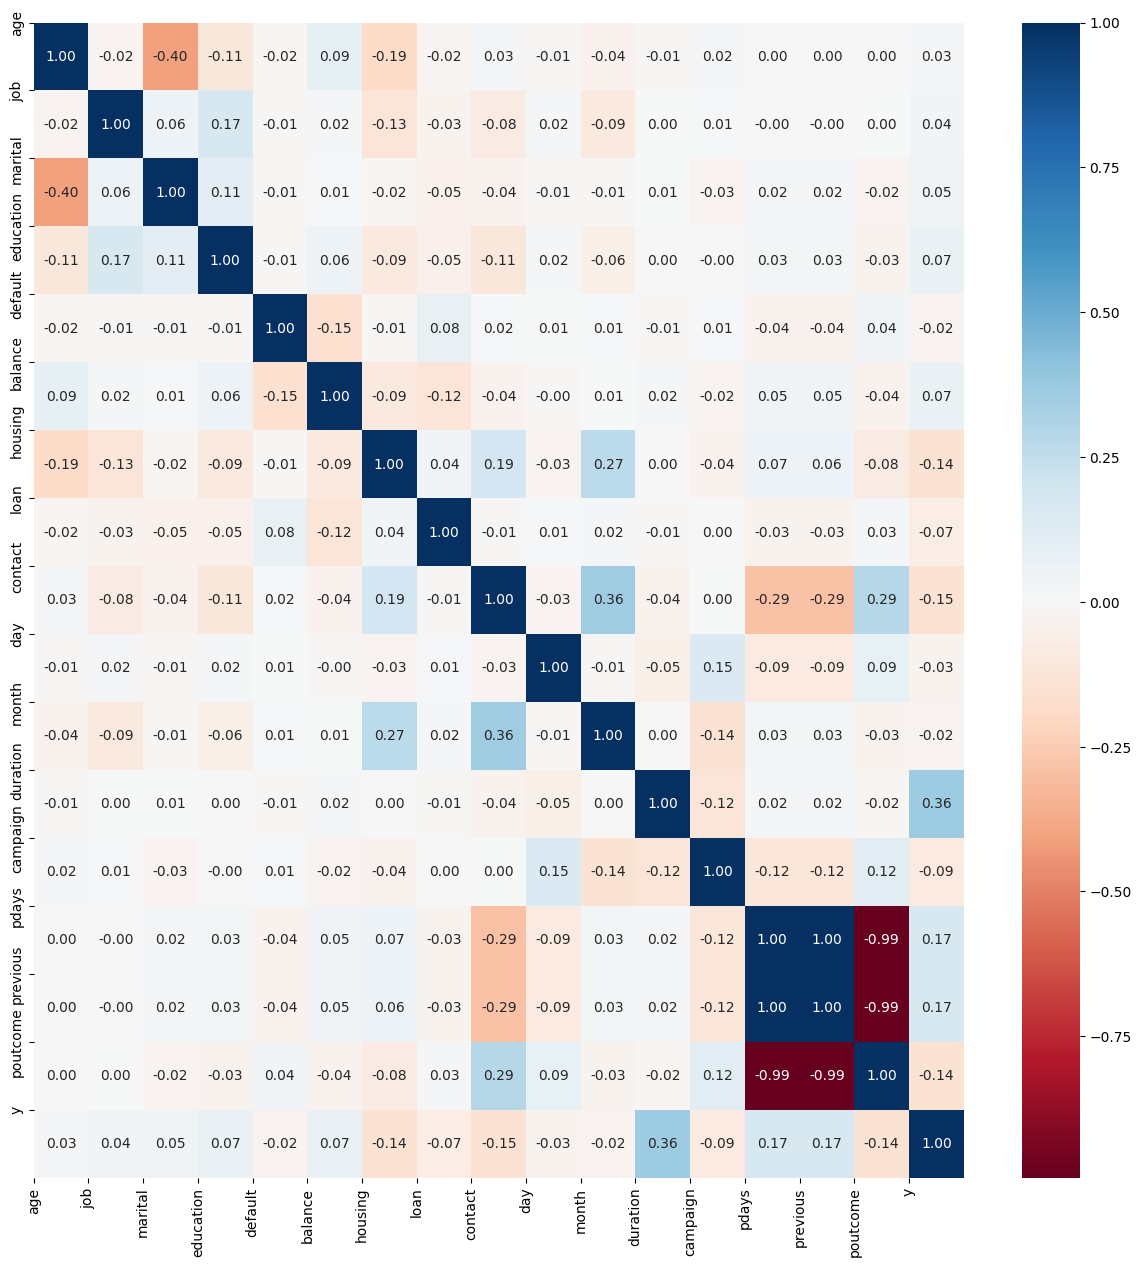

In [19]:
corr = train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    ➡️ We use Heatmap to find relations between features.
</span></h5>
    
<h3 style="font-weight:700">Most related features :</h3>
<ul><span style="color:green; font-weight:600"> duration : 0.36</span></ul>
<ul><span style="color:red; font-weight:600"> contact : -0.15</span></ul>
<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    ➡️ Summarizing the above analysis, some features can be removed.
</span></h5>

In [20]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [21]:
train= train.drop(columns=['job','default','marital'],axis=1)
test = test.drop(columns=['job','default','marital'],axis=1)

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️ Remove features that have less impact on the target prediction.
</span></h5>

In [22]:
X= train.drop(columns=['y'],axis=1)
y= train['y']

from sklearn.preprocessing import MinMaxScaler

X_train=X
y_train=y

MinMaxScaler = MinMaxScaler()
X_train = MinMaxScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.519481,0.666667,0.631536,1.0,0.0,1.0,0.133333,0.727273,0.520941,0.000000,0.000000,0.000000,1.000000
1,0.337662,0.333333,0.616837,1.0,0.0,1.0,0.133333,0.727273,0.451061,0.000000,0.000000,0.000000,1.000000
2,0.194805,0.333333,0.616475,1.0,1.0,1.0,0.133333,0.727273,0.370697,0.000000,0.000000,0.000000,1.000000
3,0.376623,1.000000,0.627672,1.0,0.0,1.0,0.133333,0.727273,0.392271,0.000000,0.000000,0.000000,1.000000
4,0.194805,1.000000,0.616457,0.0,0.0,1.0,0.133333,0.727273,0.484998,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.666667,0.623220,0.0,0.0,0.0,0.533333,0.818182,0.712862,0.540834,0.000000,0.000000,1.000000
45207,0.688312,0.000000,0.629051,0.0,0.0,0.0,0.533333,0.818182,0.597858,0.364096,0.000000,0.000000,1.000000
45208,0.701299,0.333333,0.650773,0.0,0.0,0.0,0.533333,0.818182,0.735779,0.712618,0.987953,0.996653,0.244696
45209,0.506494,0.333333,0.622119,0.0,0.0,0.5,0.533333,0.818182,0.613438,0.644608,0.000000,0.000000,1.000000


In [23]:
test= test.drop(columns=['y'],axis=1)

from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
test = MinMaxScaler.fit_transform(test)
test = pd.DataFrame(test)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.161765,0.000000,0.463177,0.0,0.0,0.0,0.600000,0.909091,0.330207,0.000000,0.000000,0.000000,1.000000
1,0.205882,0.333333,0.496196,1.0,1.0,0.0,0.333333,0.727273,0.485743,0.000000,0.994047,0.998664,0.000000
2,0.235294,0.666667,0.457789,1.0,0.0,0.0,0.500000,0.000000,0.457825,0.000000,0.993823,0.942145,0.000000
3,0.161765,0.666667,0.459368,1.0,1.0,1.0,0.066667,0.545455,0.469497,0.648942,0.000000,0.000000,1.000000
4,0.588235,0.333333,0.437453,1.0,0.0,1.0,0.133333,0.727273,0.490139,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.205882,0.333333,0.407164,1.0,0.0,0.0,0.966667,0.454545,0.553234,0.717409,0.000000,0.000000,1.000000
4517,0.558824,0.666667,0.000000,1.0,1.0,1.0,0.266667,0.727273,0.427992,0.000000,0.000000,0.000000,1.000000
4518,0.558824,0.333333,0.443126,0.0,0.0,0.0,0.600000,0.090909,0.425954,0.882952,0.000000,0.000000,1.000000
4519,0.132353,0.333333,0.455062,0.0,0.0,0.0,0.166667,0.272727,0.401861,0.648942,0.989518,0.996654,0.032822


<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    ➡️ Map features in range 0 to 1 to normalize data and decrease effect of big values by <code>MinMaxScaler()</code>.
</span></h5>

In [24]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (36168, 13)
Shape of X_eval:  (9043, 13)
Shape of y_train:  (36168,)
Shape of y_eval (9043,)


 <h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  split the validation set for modeling results.
</span></h5>

<a name="5"></a>
# **<h1 id="5" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Choose Models</h1>**

 <h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  We define a simple get_score that takes commonly used models and directly compares them using the predicted parameter.
</span></h5>

In [25]:
def get_score(model,X_train,y_train):
    n = cross_val_score(model,X_train,y_train,scoring ='accuracy',cv=5)
    return n

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier,BaggingClassifier
from sklearn.ensemble import  AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB ,BernoulliNB
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC , LinearSVC
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

 <h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  Import Machine Learning Models.
</span></h5>

In [27]:
print("XGBClassifier_ACC: {0:.3f}".format(get_score(XGBClassifier(),X_train,y_train).mean()))
print("LGBMClassifier_ACC: {0:.3f}".format(get_score(LGBMClassifier(),X_train,y_train).mean()))
print("CatBoostClassifier_ACC: {0:.3f}".format(get_score(CatBoostClassifier(logging_level='Silent'),X_train,y_train).mean()))
print("KNeighborsClassifier_ACC: {0:.3f}".format(get_score(KNeighborsClassifier(),X_train,y_train).mean()))
print("LogisticRegression_ACC: {0:.3f}".format(get_score(LogisticRegression(),X_train,y_train).mean()))
print("SGDClassifier_ACC: {0:.3f}".format(get_score(SGDClassifier(),X_train,y_train).mean()))
print("RidgeClassifier_ACC: {0:.3f}".format(get_score(RidgeClassifier(),X_train,y_train).mean()))
print("RandomForestClassifier_ACC: {0:.3f}".format(get_score(RandomForestClassifier(),X_train,y_train).mean()))
print("ExtraTreesClassifier_ACC: {0:.3f}".format(get_score(ExtraTreesClassifier(),X_train,y_train).mean()))
print("HistGradientBoostingClassifier_ACC: {0:.3f}".format(get_score(HistGradientBoostingClassifier(),X_train,y_train).mean()))
print("BaggingClassifier_ACC: {0:.3f}".format(get_score(BaggingClassifier(),X_train,y_train).mean()))
print("AdaBoostClassifier_ACC: {0:.3f}".format(get_score(AdaBoostClassifier(),X_train,y_train).mean()))
print("GradientBoostingClassifier_ACC: {0:.3f}".format(get_score(GradientBoostingClassifier(),X_train,y_train).mean()))
print("GaussianNB_ACC: {0:.3f}".format(get_score(GaussianNB(),X_train,y_train).mean()))   
print("BernoulliNB_ACC: {0:.3f}".format(get_score(BernoulliNB(),X_train,y_train).mean()))
print("DummyClassifier_ACC: {0:.3f}".format(get_score(DummyClassifier(),X_train,y_train).mean()))
print("LinearSV_ACC: {0:.3f}".format(get_score(LinearSVC(),X_train,y_train).mean()))
print("LinearDiscriminantAnalysis_ACC: {0:.3f}".format(get_score(LinearDiscriminantAnalysis(),X_train,y_train).mean()))
print("DecisionTreeClassifiers_ACC: {0:.3f}".format(get_score(DecisionTreeClassifier(),X_train,y_train).mean()))

XGBClassifier_ACC: 0.905
LGBMClassifier_ACC: 0.908
CatBoostClassifier_ACC: 0.907
KNeighborsClassifier_ACC: 0.892
LogisticRegression_ACC: 0.898
SGDClassifier_ACC: 0.892
RidgeClassifier_ACC: 0.894
RandomForestClassifier_ACC: 0.902
ExtraTreesClassifier_ACC: 0.899
HistGradientBoostingClassifier_ACC: 0.907
BaggingClassifier_ACC: 0.895
AdaBoostClassifier_ACC: 0.896
GradientBoostingClassifier_ACC: 0.902
GaussianNB_ACC: 0.813
BernoulliNB_ACC: 0.866
DummyClassifier_ACC: 0.883
LinearSV_ACC: 0.897
LinearDiscriminantAnalysis_ACC: 0.895
DecisionTreeClassifiers_ACC: 0.872


 <h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  Select five models with higher scores for stacking. 
<ul><span style="color:blue; font-weight:600"> top1(0.908) : LGBMClassifier</span></ul>
<ul><span style="color:blue; font-weight:600"> top2(0.907) : CatBoostClassifier</span></ul>
<ul><span style="color:blue; font-weight:600"> top3(0.906) : HistGradientBoostingClassifier</span></ul>
<ul><span style="color:blue; font-weight:600"> top4(0.905) : XGBClassifier</span></ul>
<ul><span style="color:blue; font-weight:600"> top5(0.903) : RandomForestClassifier</span></ul>
</span></h5>

<a name="6"></a>
# **<h1 id="6" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Build Stacking</h1>**

 <h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  Define StackingClassifier model.
</span></h5>

In [29]:
clf1 = RandomForestClassifier()
clf2 = XGBClassifier()
clf3 = HistGradientBoostingClassifier()
clf4 = CatBoostClassifier(logging_level='Silent')
clf5 = LGBMClassifier()

In [30]:
stacked_averaged_models = StackingAveragedModels(base_models = (clf1,clf2,clf3,clf4),meta_model = clf5) 

 <h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  Define base_models and meta_model.
</span></h5>

In [31]:
stacking_model=stacked_averaged_models.fit(X_train.values, y_train.values)
stacking_model.fit(X_train.values , y_train.values)

StackingAveragedModels(base_models=(RandomForestClassifier(),
                                    XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_con...
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...),
                                    HistGradientBoostingClassifier(),
                                    <catboost.core.CatBoostClassifier object at 0x7f6df86a5660>),
                       meta_model=LGBMClassifier())

 <h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  StackingClassifier model training.
</span></h5>

<a name="7"></a>
# **<h1 id="7" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Model Performance</h1>**

StackingClassifier_eval accuracy is: 91.386%


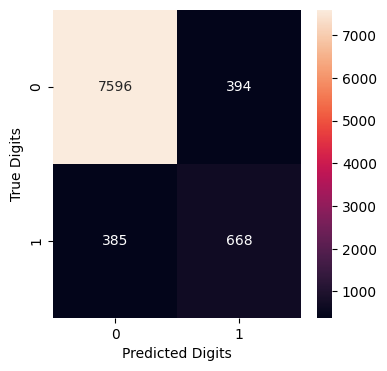

In [32]:
pred_stack_eval = stacking_model.predict(X_eval.values)
stack_acc_eval = accuracy_score(y_eval.values, pred_stack_eval)
print("StackingClassifier_eval accuracy is: {0:.3f}%".format(stack_acc_eval * 100))
cm = confusion_matrix(y_eval.values, pred_stack_eval)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

 <h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  The accuracy of the eval dataset is about 90%.
</span></h5>

StackingClassifier_test accuracy is: 90.069%


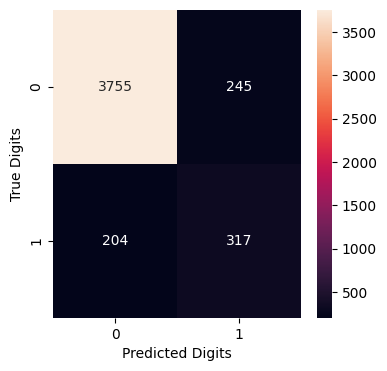

In [33]:
y_test= pd.DataFrame(test_first['y'])
y_test["y"] = y_test["y"].replace({'no':0,'yes':1,})

pred_stack_test = stacking_model.predict(test.values)
stack_acc_test = accuracy_score(y_test.values, pred_stack_test)
print("StackingClassifier_test accuracy is: {0:.3f}%".format(stack_acc_test * 100))
cm = confusion_matrix(y_test.values, pred_stack_test)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

 <h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  The accuracy in the test dataset is also around 90%, which means that no overfitting has occurred in this model. Stacking is a powerful ensemble learning strategy that can significantly improve the prediction performance of machine learning models. Stacking reduces bias and variance, increases model diversity, and improves the interpretability of final predictions by merging the predictions of many underlying models.
</span></h5>
</span></h5>

<div style="border-radius:10px; padding: 15px; background-color:navy">
<h4 align="center"><span style="font-weight:1000; font-size:500%; text-shadow:3px 3px 20px #add8e6"><font color=#ffffff>Thanks </font></span></h4>